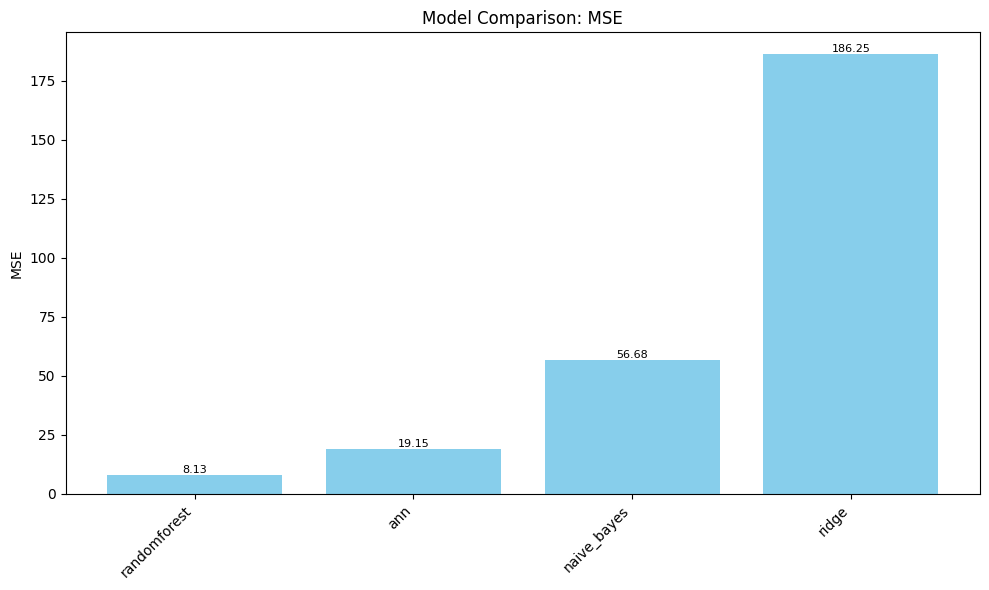

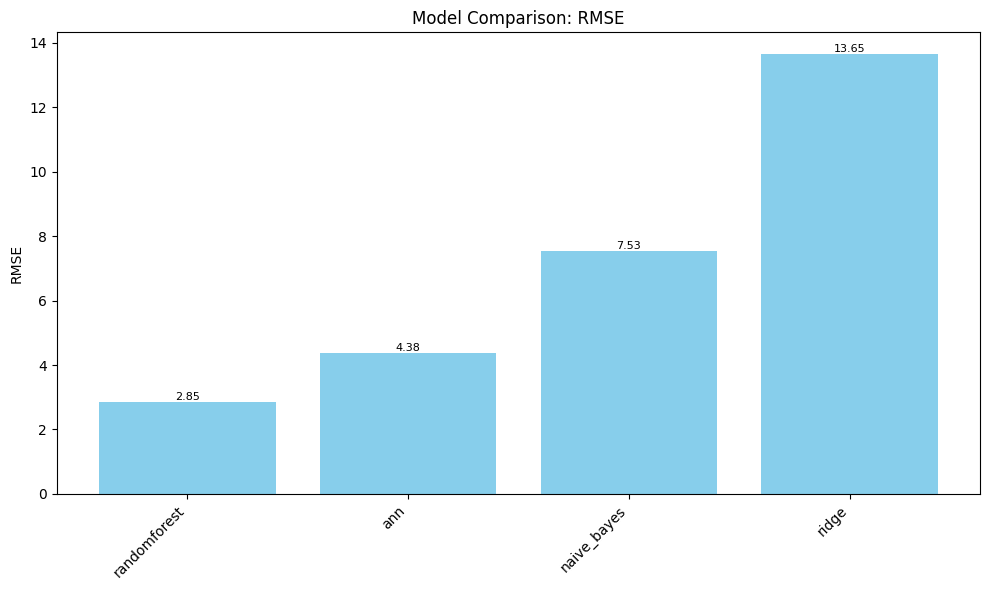

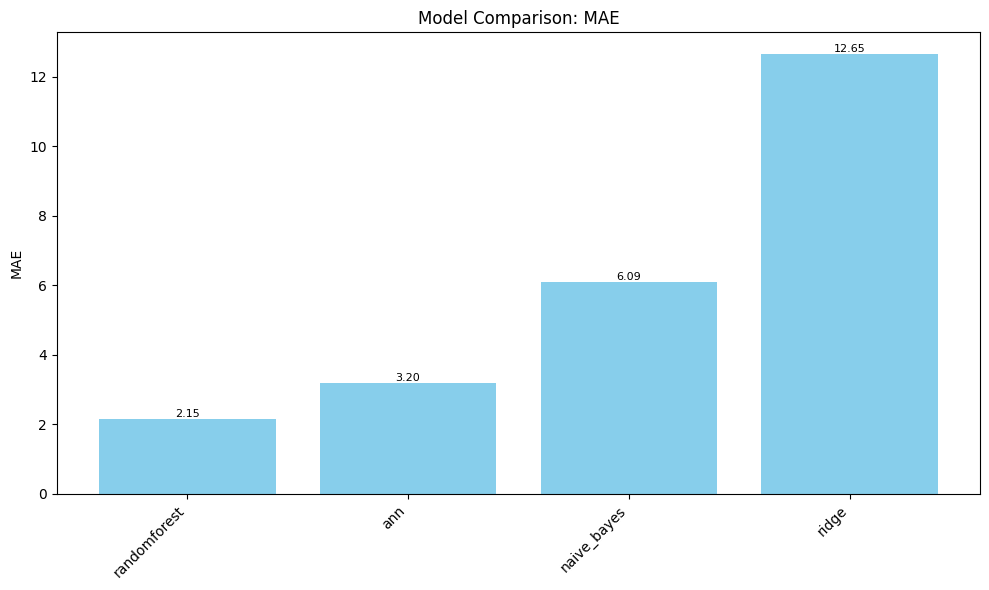

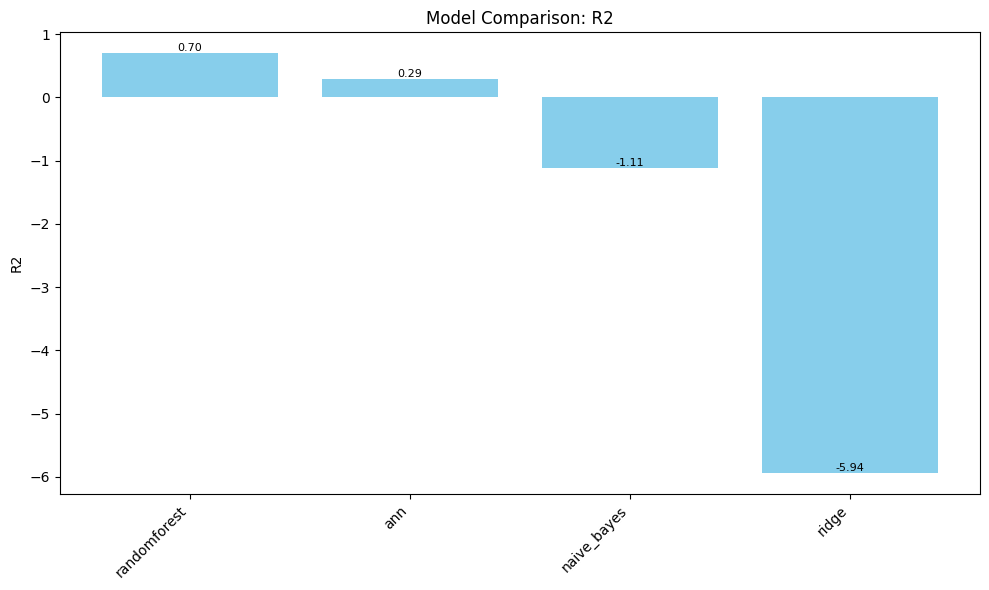

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def load_model_metrics(results_root="results/model"):
    all_metrics = []

    for root, dirs, files in os.walk(results_root):
        for file in files:
            if file.endswith(".csv"):
                full_path = os.path.join(root, file)
                try:
                    df = pd.read_csv(full_path)
                    if "mse" in df.columns:
                        row = df.iloc[0].copy()
                        row["model"] = os.path.splitext(file)[0]  # file name without extension
                        all_metrics.append(row)
                except Exception as e:
                    print(f"Skipping {file}: {e}")

    return pd.DataFrame(all_metrics)


def plot_metric_comparison(df, metric, save_path=None):
    plt.figure(figsize=(10, 6))
    sorted_df = df.sort_values(metric, ascending=True if metric != "r2" else False)
    bars = plt.bar(sorted_df["model"], sorted_df[metric], color="skyblue")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(metric.upper())
    plt.title(f"Model Comparison: {metric.upper()}")
    plt.tight_layout()

    for bar, val in zip(bars, sorted_df[metric]):
        plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height(), f"{val:.2f}",
                 ha='center', va='bottom', fontsize=8)

    if save_path:
        plt.savefig(save_path, dpi=300)
    plt.show()


def run_visualization():
    df = load_model_metrics("results/model")
    if df.empty:
        print("No model metrics found.")
        return

    # Plot comparisons for key metrics
    for metric in ["mse", "rmse", "mae", "r2"]:
        plot_metric_comparison(df, metric)


if __name__ == "__main__":
    run_visualization()


In [1]:
import os
import pandas as pd

def collect_enrichment_results(analysis_dir="results/analysis"):
    all_rows = []
    
    for root, _, files in os.walk(analysis_dir):
        for file in files:
            if file.endswith(".csv"):
                filepath = os.path.join(root, file)
                try:
                    df = pd.read_csv(filepath)
                    if {"Term", "Genes", "Adjusted P-value"}.issubset(df.columns):
                        significant_df = df[df["Adjusted P-value"] < 0.05][["Term", "Genes", "Adjusted P-value"]].copy()
                        if not significant_df.empty:
                            significant_df["File"] = file
                            significant_df["Analysis Type"] = df["Gene_set"]
                            all_rows.append(significant_df)
                except Exception as e:
                    print(f"⚠️ Skipping {file}: {e}")
    
    if all_rows:
        return pd.concat(all_rows, ignore_index=True)
    else:
        return pd.DataFrame(columns=["Term", "Genes", "Adjusted P-value", "File", "Analysis Type"])

# Run this in your notebook
enrichment_summary_df = collect_enrichment_results("results/analysis")
enrichment_summary_df.head(20)  # Show top 20 rows


,Term,Genes,Adjusted P-value,File,Analysis Type
0,"Intramolecular Oxidoreductase Activity, Transp...",GSTA1;HSD3B1,0.005262,RR1_GO_Molecular_Function_2023_top_enrichment.csv,GO_Molecular_Function_2023
1,Chemokine Signaling Pathway WP2292,CCL12;CCL7;CCL21A,0.031973,RR1_WikiPathways_2024_Mouse_top_enrichment.csv,WikiPathways_2024_Mouse
2,Peroxiredoxin 2 Induced Ovarian Failure WP4835,CYP11A1,0.045106,RR1_WikiPathways_2024_Mouse_top_enrichment.csv,WikiPathways_2024_Mouse
3,Leptin And Adiponectin WP683,ADIPOQ,0.045106,RR1_WikiPathways_2024_Mouse_top_enrichment.csv,WikiPathways_2024_Mouse
4,Metapathway Biotransformation WP1251,CYP11A1;GSTA1,0.045106,RR1_WikiPathways_2024_Mouse_top_enrichment.csv,WikiPathways_2024_Mouse
5,Estrogen Metabolism WP1264,GSTA1,0.045106,RR1_WikiPathways_2024_Mouse_top_enrichment.csv,WikiPathways_2024_Mouse
6,Steroid Biosynthesis WP55,HSD3B1,0.045106,RR1_WikiPathways_2024_Mouse_top_enrichment.csv,WikiPathways_2024_Mouse


In [3]:
pd.set_option('display.max_colwidth', None)
enrichment_summary_df["Term"]

0    Intramolecular Oxidoreductase Activity, Transposing C=C Bonds (GO:0016863)
1                                            Chemokine Signaling Pathway WP2292
2                                Peroxiredoxin 2 Induced Ovarian Failure WP4835
3                                                  Leptin And Adiponectin WP683
4                                          Metapathway Biotransformation WP1251
5                                                    Estrogen Metabolism WP1264
6                                                     Steroid Biosynthesis WP55
Name: Term, dtype: object